# Imports

In [1]:
import numpy as np

In [2]:
from src.convolution.numerical import convolution
from src.spectrum import (
    LinealEnergySpectrum,
    SpectrumData,
    SpectrumValueType,
    SpecificEnergySpectrum,
    specific_energy_spectum,
)
from src.paths import project_dir

In [3]:
# plotting
import matplotlib

%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.9.8


# Single event spectra for low energy photons

## Raw Data

Fig 4.8b from P. Olko PhD thesis, panel for 1 um

In [5]:
spectrum_y_f1_raw = LinealEnergySpectrum.from_csv(
    project_dir / "data" / "interim" / "Xrays_12keV_0.5um_ydy.csv",
    delimiter=",",
    value_type=SpectrumValueType.ydy,
)
spectrum_y_f1_raw.norm

0.9999999999999997

## f1 y spectrum

In [6]:
spectrum_y_f1 = LinealEnergySpectrum(
    data=SpectrumData(
        bin_centers=spectrum_y_f1_raw.y,
        bin_values_freq_times_x=spectrum_y_f1_raw.yfy.clip(min=0),
    )
)

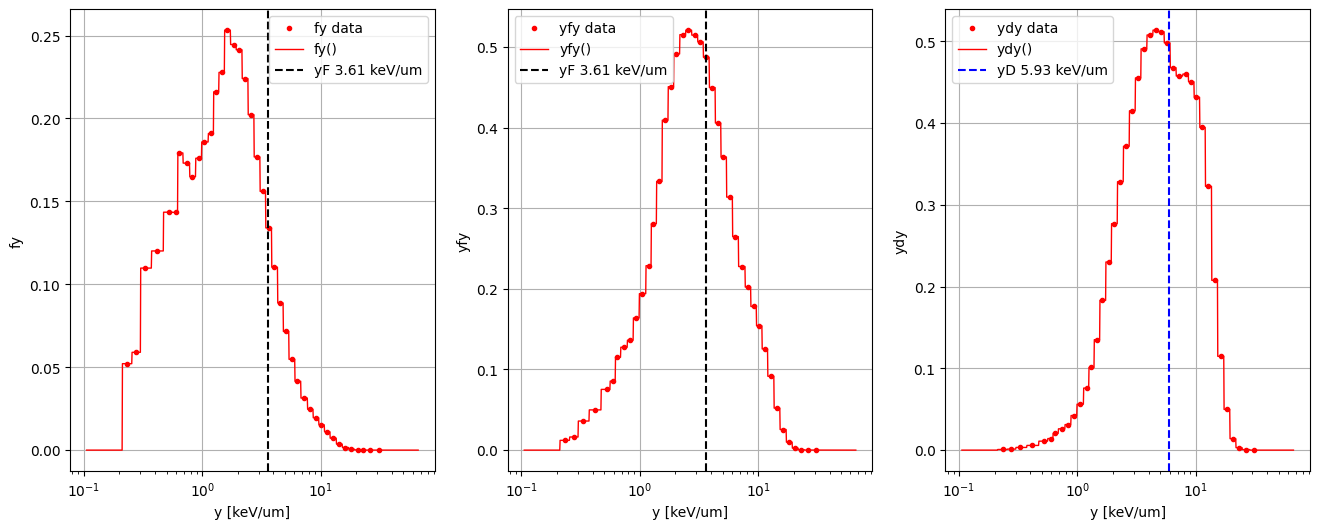

In [7]:
y_kev_um = np.geomspace(
    start=spectrum_y_f1.data.bin_edges[0] / 2,
    stop=spectrum_y_f1.data.bin_edges[-1] * 2,
    num=1000,
)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax[0].plot(spectrum_y_f1.y, spectrum_y_f1.fy, ".", label="fy data", color="r")
ax[0].plot(
    y_kev_um,
    spectrum_y_f1.data.bin_values(y_kev_um, spectrum_value_type=SpectrumValueType.fy),
    label="fy()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[0].axvline(
    spectrum_y_f1.yF,
    color="k",
    linestyle="--",
    label=f"yF {spectrum_y_f1.yF:2.2f} keV/um",
)
ax[0].set_ylabel("fy")
ax[1].plot(spectrum_y_f1.y, spectrum_y_f1.yfy, ".", label="yfy data", color="r")
ax[1].plot(
    y_kev_um,
    spectrum_y_f1.data.bin_values(y_kev_um, spectrum_value_type=SpectrumValueType.yfy),
    label="yfy()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[1].axvline(
    spectrum_y_f1.yF,
    color="k",
    linestyle="--",
    label=f"yF {spectrum_y_f1.yF:2.2f} keV/um",
)
ax[1].set_ylabel("yfy")
ax[2].plot(spectrum_y_f1.y, spectrum_y_f1.ydy, ".", label="ydy data", color="r")
ax[2].plot(
    y_kev_um,
    spectrum_y_f1.data.bin_values(y_kev_um, spectrum_value_type=SpectrumValueType.ydy),
    label="ydy()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[2].axvline(
    spectrum_y_f1.yD,
    color="b",
    linestyle="--",
    label=f"yD {spectrum_y_f1.yD:2.2f} keV/um",
)
ax[2].set_ylabel("ydy")
for a in ax:
    a.set_xscale("log")
    a.grid()
    a.set_xlabel("y [keV/um]")
    a.legend()

## f1 z spectrum

In [8]:
site_diam_um = 0.5
spectrum_z_f1 = specific_energy_spectum(spectrum_y_f1, site_diam_um=site_diam_um)

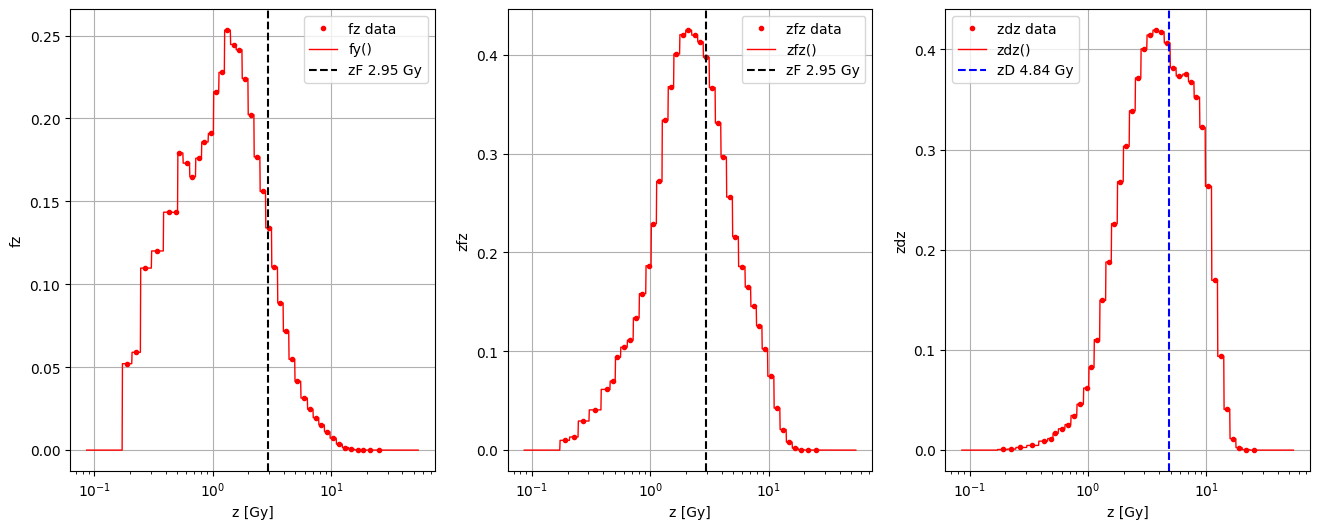

In [9]:
z_Gy = np.geomspace(
    start=spectrum_z_f1.data.bin_edges[0] / 2,
    stop=spectrum_z_f1.data.bin_edges[-1] * 2,
    num=1000,
)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax[0].plot(spectrum_z_f1.z, spectrum_z_f1.fz, ".", label="fz data", color="r")
ax[0].plot(
    z_Gy,
    spectrum_z_f1.data.bin_values(z_Gy, spectrum_value_type=SpectrumValueType.fz),
    label="fy()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[0].axvline(
    spectrum_z_f1.zF, color="k", linestyle="--", label=f"zF {spectrum_z_f1.zF:2.2f} Gy"
)
ax[0].set_ylabel("fz")
ax[1].plot(spectrum_z_f1.z, spectrum_z_f1.zfz, ".", label="zfz data", color="r")
ax[1].plot(
    z_Gy,
    spectrum_z_f1.data.bin_values(z_Gy, spectrum_value_type=SpectrumValueType.yfy),
    label="zfz()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[1].axvline(
    spectrum_z_f1.zF, color="k", linestyle="--", label=f"zF {spectrum_z_f1.zF:2.2f} Gy"
)
ax[1].set_ylabel("zfz")
ax[2].plot(spectrum_z_f1.z, spectrum_z_f1.zdz, ".", label="zdz data", color="r")
ax[2].plot(
    z_Gy,
    spectrum_z_f1.data.bin_values(z_Gy, spectrum_value_type=SpectrumValueType.ydy),
    label="zdz()",
    linestyle="-",
    linewidth=1,
    color="r",
)
ax[2].axvline(
    spectrum_z_f1.zD, color="b", linestyle="--", label=f"zD {spectrum_z_f1.zD:2.2f} Gy"
)
ax[2].set_ylabel("zdz")
for a in ax:
    a.set_xscale("log")
    a.grid()
    a.set_xlabel("z [Gy]")
    a.legend()